<a href="https://colab.research.google.com/github/Julidmz/Data_Inmersion/blob/main/DATA_INMERSION_TAREA_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ejercicio 2
#1)
# - Estudiar mejor el histograma de valores, seleccionar y comparar 3 tipos de inmuebles.
# - Refinar el grafico: tamaño de titulos, aumentar el tamaño de labels, colores, conclusión de la informacion.

#2)
# - Precio del m2 por barrio y hacer el gráfico más adecuado para esta nueva variable

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

inmuebles = pd.read_csv('/content/drive/MyDrive/inmuebles_bogota.csv')
inmuebles.head()

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000


In [ ]:
columnas = {
    'Baños': 'Banos',
    'Área': 'Area'
}

inmuebles = inmuebles.rename(columns=columnas)

In [ ]:
inmuebles.Valor[0]

'$ 360.000.000'

In [ ]:
inmuebles.Valor[0]+inmuebles.Valor[1]


'$ 360.000.000$ 670.000.000'

In [ ]:
inmuebles.Valor[0].split()

['$', '360.000.000']

In [ ]:
inmuebles.Valor.str.split()

0         [$, 360.000.000]
1         [$, 670.000.000]
2       [$, 1.120.000.000]
3         [$, 890.000.000]
4         [$, 970.000.000]
               ...        
9515      [$, 290.000.000]
9516      [$, 670.000.000]
9517      [$, 900.000.000]
9518      [$, 335.000.000]
9519      [$, 144.990.000]
Name: Valor, Length: 9520, dtype: object

In [ ]:

inmuebles.Valor.str.split()

0         [$, 360.000.000]
1         [$, 670.000.000]
2       [$, 1.120.000.000]
3         [$, 890.000.000]
4         [$, 970.000.000]
               ...        
9515      [$, 290.000.000]
9516      [$, 670.000.000]
9517      [$, 900.000.000]
9518      [$, 335.000.000]
9519      [$, 144.990.000]
Name: Valor, Length: 9520, dtype: object

In [ ]:
inmuebles.Valor.str.split(expand=True)

,0,1
0,$,360.000.000
1,$,670.000.000
2,$,1.120.000.000
3,$,890.000.000
4,$,970.000.000
...,...,...
9515,$,290.000.000
9516,$,670.000.000
9517,$,900.000.000
9518,$,335.000.000


In [ ]:
valor = inmuebles.Valor.str.split(expand=True)

inmuebles['Moneda'] = valor[0]
inmuebles['Precio'] = valor[1]
inmuebles.sample()

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio
3551,Apartamento,Apartamento en venta en Usaquén,3,4,145,Usaquén,Usaquén,$ 870.000.000,$,870.000.000


In [ ]:
inmuebles['Precio'] = inmuebles['Precio'].str.replace('.','',regex=True) 
inmuebles[['Precio','Barrio']]

,Precio,Barrio
0,360000000,Zona Noroccidental
1,670000000,Castilla
2,1120000000,Chico Reservado
3,890000000,Usaquén
4,970000000,Bella Suiza
...,...,...
9515,290000000,Kennedy
9516,670000000,Parque Central Bavaria
9517,900000000,Restrepo
9518,335000000,Engativa


In [ ]:
inmuebles['Precio Millon'] = inmuebles.Precio.astype('float')/1000000

In [ ]:
inmuebles.describe()

,Habitaciones,Banos,Area,Precio Millon
count,9520.000000,9520.000000,9520.000000,9520.000000
mean,3.072479,2.447899,146.664706,602.062354
std,2.049856,1.255314,1731.379622,704.602062
min,1.000000,0.000000,2.000000,60.000000
25%,2.000000,2.000000,57.000000,250.000000
50%,3.000000,2.000000,80.000000,409.182500
75%,3.000000,3.000000,135.000000,680.000000
max,110.000000,9.000000,166243.000000,16000.000000


In [ ]:
pd.set_option('display.precision',2)
pd.set_option('display.float.format', lambda x: '%.2f' % x)
inmuebles.describe()

,Habitaciones,Banos,Area,Precio Millon
count,9520.00,9520.00,9520.00,9520.00
mean,3.07,2.45,146.66,602.06
std,2.05,1.26,1731.38,704.60
min,1.00,0.00,2.00,60.00
25%,2.00,2.00,57.00,250.00
50%,3.00,2.00,80.00,409.18
75%,3.00,3.00,135.00,680.00
max,110.00,9.00,166243.00,16000.00


In [34]:
tipo_inmuebles_seleccionados=inmuebles[inmuebles.Tipo.isin(['Casa','Oficina/Consultorio','Local'])]
tipo_inmuebles_seleccionados

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio Millon
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000,$,670000000,670.00
11,Casa,Casa en venta en Tintala,3,2,59,Tintala,Tintala,$ 168.000.000,$,168000000,168.00
13,Casa,Casa en venta en Marly,3,3,147,Marly,CHAPINERO: Pardo Rubio + Chapinero,$ 300.000.000,$,300000000,300.00
15,Casa,Casa en venta en Zona Noroccidental,3,4,300,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 2.519.000.000,$,2519000000,2519.00
19,Casa,Casa en venta en Zona Noroccidental,3,6,380,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 1.600.000.000,$,1600000000,1600.00
...,...,...,...,...,...,...,...,...,...,...,...
9512,Casa,Casa en venta en Kennedy,7,4,270,Kennedy,Kennedy Central,$ 615.000.000,$,615000000,615.00
9513,Casa,Casa en venta en San Luis,14,6,594,San Luis,Galerías,$ 1.200.000.000,$,1200000000,1200.00
9514,Casa,Casa en venta en Kennedy,4,2,240,Kennedy,Kennedy Central,$ 555.000.000,$,555000000,555.00
9517,Local,Local en venta en Restrepo,8,6,383,Restrepo,Restrepo,$ 900.000.000,$,900000000,900.00


In [ ]:
tipo_inmuebles_seleccionados.describe()

,Habitaciones,Banos,Area,Precio Millon
count,111.00,111.00,111.00,111.00
mean,4.28,3.11,253.05,1228.94
std,4.30,2.57,273.41,1246.43
min,1.00,1.00,15.00,60.00
25%,1.00,1.00,49.00,350.00
50%,3.00,2.00,134.00,1000.00
75%,5.00,4.00,384.00,1550.00
max,16.00,9.00,1200.00,6720.79


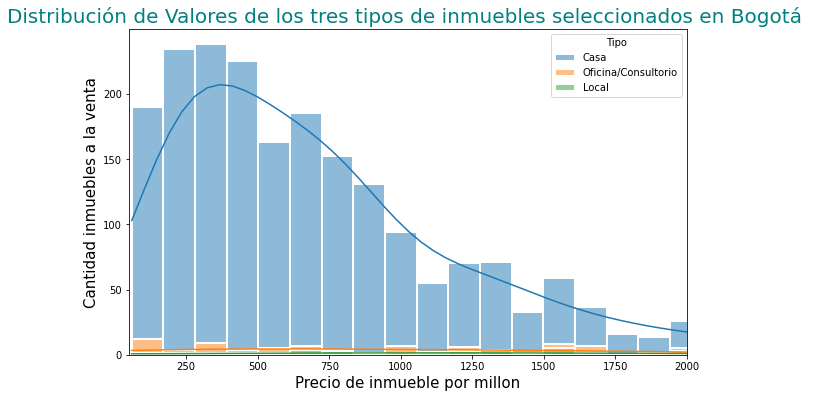

In [98]:
plt.figure(figsize=(10,6))

titulo =  {'fontsize': 13, 'color': 'teal', 'fontweight': 'medium'}

grafica = sns.histplot(data=tipo_inmuebles_seleccionados, x = 'Precio Millon', kde=True, hue='Tipo', multiple="stack", edgecolor = "white", linewidth = 2,)
grafica.set_title('Distribución de Valores de los tres tipos de inmuebles seleccionados en Bogotá ', fontsize = 20, fontdict = titulo)

plt.xlim((50,2000))

plt.xlabel('Precio de inmueble por millon', fontsize=15)
plt.ylabel('Cantidad inmuebles a la venta', fontsize=15)

plt.show()

##Los inmuebles del tipo Casa son los que mas se venden y estan en muchos precios distintos.
##Los inmuebles del tipo Oficina/Consultorio tienen muy pocas frecuencias de venta.
##El tipo Local practicamente tiene casi nula frecuencia de venta si lo comparamos con el tipo inmueble casa

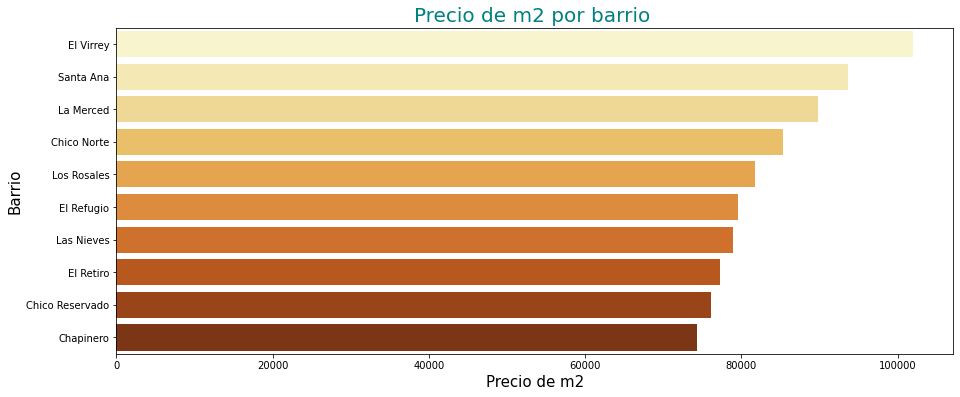

In [97]:
m2_inmuebles = inmuebles.Precio.astype(float)/(inmuebles.Area.astype(float)*(100))
inmuebles['precio_m2'] = m2_inmuebles

media_m2_barrio = inmuebles.groupby('Barrio')['precio_m2'].mean().reset_index().sort_values(by='precio_m2', ascending=False).head(10)

plt.figure(figsize=(15,6))

titulo =  {'fontsize': 13, 'color': 'teal', 'fontweight': 'medium'}

grafica = sns.barplot(data=media_m2_barrio, y = 'Barrio', x = 'precio_m2', palette = "YlOrBr")
grafica.set_title('Precio de m2 por barrio ', fontsize = '20', fontdict = titulo)

plt.xlabel('Precio de m2', fontsize='15')
plt.ylabel('Barrio', fontsize='15')

plt.show()


##El barrio El Virrey tiene el mayor precio en inmuebles por metro cuadrado

##El barrio chapinero tiene el valor mas bajo en inmuebles por metro cuadrado